***
## required library

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string
import nltk
import os


# for visualization
plt.style.use('fivethirtyeight')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***
## read the data

In [2]:
# load data by using pandas command [pd.read_csv]
train = pd.read_csv('Train_set.csv')
train

Unnamed: 0     id                                               Body  \
0            4006  83044  Subject: new jcc stuff  vince , i ' m gone thr...   
1            6645  36465  Subject: = ? iso - 8859 - 1 ? q ? automaattine...   
2           13662  30041  Subject: we need your help\n dear southtrust c...   
3            7706  72756  bank accountdoctyp html public wnumbercdtd htm...   
4           10855  54804  Subject: dinner speaker - may 23\n vince :\n m...   
...           ...    ...                                                ...   
13148        9225  68399  Subject: re : test  dear vince : the email add...   
13149       13123   6407  Subject: all graphics software available , che...   
13150        9845  56243  Subject: introduction of the european gas advi...   
13151       10799  70202  Subject: credit business plan  hi jeff ,  my r...   
13152        2732  54742  Subject: re : confirmation of meeting  fyi  - ...   

       Label  
0        0.0  
1        1.0  
2        1.0  
3        1.0  
4        0.0  
...      ...  
13148    0.0  
13149    1.0  
13150    0.0  
13151    0.0  
13152    0.0  

[13153 rows x 4 columns]

In [3]:
# load data by using pandas command [pd.read_csv]
test = pd.read_csv('Test_set.csv')
test

Unnamed: 0     id                                               Body
0           4934  22406  Subject: i ' m a changed man\n dear sir / mada...
1           8832  19495  Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2          11742  59875  Subject: ngx - enron - security in place .\n h...
3           1514  40297  Subject: sitara availability\n as a precaution...
4           4431  50696  Subject: inception document for gtv ii phase i...
...          ...    ...                                                ...
5633        3050  79976  Subject: are you lonely or horney ?\n 100 % fr...
5634       17161  53867  Subject: career opportunity  dear mr . kaminsk...
5635       17696  50221  Subject: abb on eol\n calpine and nrg risk man...
5636        1615  64131  bad focusclick behaviourtoni nugent sender dat...
5637       12432  81183  Subject: \n poisoning diagnosis ' rock\n solid...

[5638 rows x 3 columns]

### a littel visualization before the process

Text(0.5, 1.0, 'WordCloud for train ')

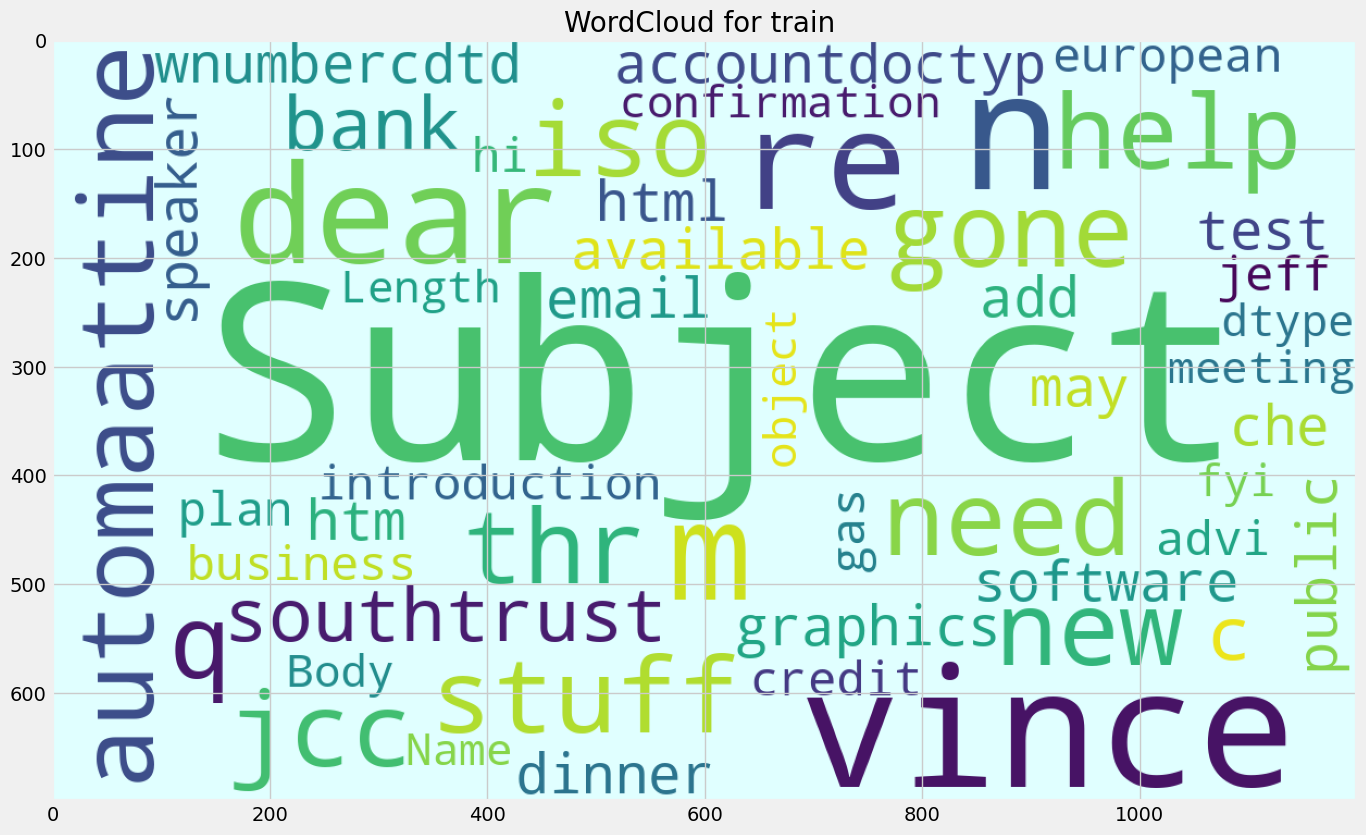

In [4]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

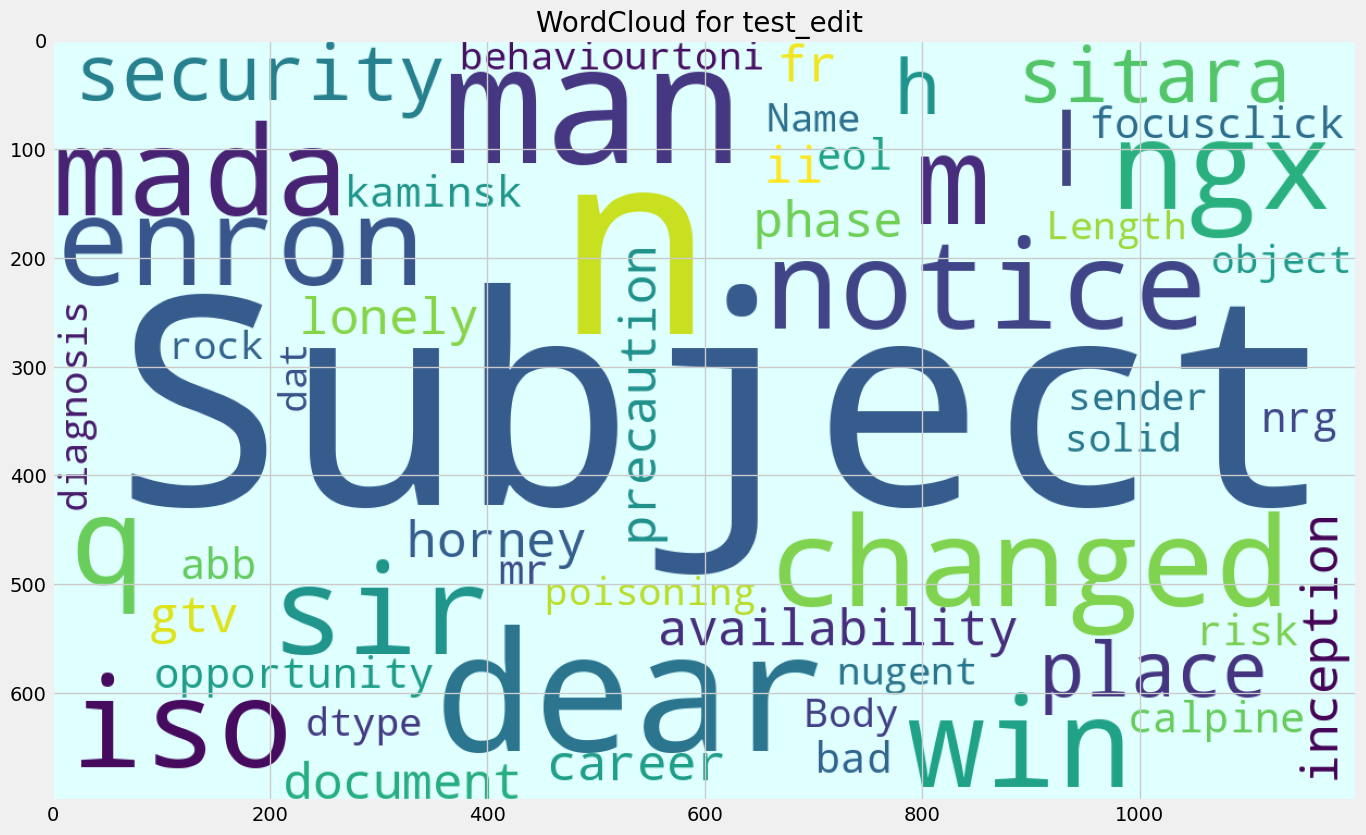

In [5]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

***
### Drop the unnecessary data

In [6]:
train = train.drop(columns=['Unnamed: 0','id'])

In [7]:
test = test.drop(columns=['Unnamed: 0'])
test

id                                               Body
0     22406  Subject: i ' m a changed man\n dear sir / mada...
1     19495  Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2     59875  Subject: ngx - enron - security in place .\n h...
3     40297  Subject: sitara availability\n as a precaution...
4     50696  Subject: inception document for gtv ii phase i...
...     ...                                                ...
5633  79976  Subject: are you lonely or horney ?\n 100 % fr...
5634  53867  Subject: career opportunity  dear mr . kaminsk...
5635  50221  Subject: abb on eol\n calpine and nrg risk man...
5636  64131  bad focusclick behaviourtoni nugent sender dat...
5637  81183  Subject: \n poisoning diagnosis ' rock\n solid...

[5638 rows x 2 columns]

In [8]:
test_edit = test.drop(columns=['id'])

In [9]:
test_edit

Body
0     Subject: i ' m a changed man\n dear sir / mada...
1     Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2     Subject: ngx - enron - security in place .\n h...
3     Subject: sitara availability\n as a precaution...
4     Subject: inception document for gtv ii phase i...
...                                                 ...
5633  Subject: are you lonely or horney ?\n 100 % fr...
5634  Subject: career opportunity  dear mr . kaminsk...
5635  Subject: abb on eol\n calpine and nrg risk man...
5636  bad focusclick behaviourtoni nugent sender dat...
5637  Subject: \n poisoning diagnosis ' rock\n solid...

[5638 rows x 1 columns]

***
## 1. Text Preprocessing ⛏

#### the steps for preprocessing the text
1. replaces any characters `(\n)` with spaces in the input text

2. ⭐  `word_tokenize`⭐

3. ⭐ `lemmatization` ⭐

4. ⭐ `filtering and cleaning on the tokenized and lemmatized words:` ⭐
 *  Removes words that start with "subject".
 *  Removes variations of "re".
 *  Removes words starting with "http".
 *  Removes punctuation symbols.
 *  Removes common stop words.
 *  If you need to remove numeric words, you can uncomment this line. **not being used**.
5. Joins the processed words back into a single string, representing the preprocessed text.

In [10]:
train['Body'].isnull().sum()

0

In [11]:
# Load spaCy's English tokenizer and tagger
nlp = spacy.load("en_core_web_sm")

> 🔑 here we include the digits with text so we stop the process on remove the digits

In [12]:
def preprocess_text(text):
    # Tokenize the text using NLTK's word_tokenize
    text = text.replace('\n', ' ')
    words = word_tokenize(text)

    # Lemmatize using spaCy
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]

    # Filter out words that start with "subject" or are in stop words, punctuation, etc.
    words = [word for word in lemmatized_words if not word.lower().startswith("subject")]
    words = [word for word in words if word.lower() != "re" and word.lower() != "'re"]
    words = [word for word in words if not word.startswith("http")]
    #words = [word for word in words if not word.isdigit()]
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word.lower() not in stop_words]

    # Join the preprocessed words back into a text
    preprocessed_text = ' '.join(words)
    return preprocessed_text


## Apply the preprocessing in training and testing
Apply preprocess_text to the 'Body' column and update the column

#### **Train**

In [13]:
train['Body'] = train['Body'].apply(preprocess_text)

In [14]:
train['Body']

0        new jcc stuff   vince go wednesday next week p...
1        iso 8859 1 q automaattinen poissaolovastaus 6 ...
2        need help   dear southtrust customer   fraudul...
3        bank accountdoctyp html public wnumbercdtd htm...
4        dinner speaker may 23   vince   michael crew w...
                               ...                        
13148    test   dear vince email address candice   cgka...
13149    graphic software available cheap oem version  ...
13150    introduction european gas advisory service eur...
13151    credit business plan   hi jeff   research coll...
13152    confirmation meeting   fyi   forward shirley c...
Name: Body, Length: 13153, dtype: object

#### **Test**

In [15]:
test_edit['Body'] = test_edit['Body'].apply(preprocess_text)

In [16]:
test_edit['Body']

0       change man   dear sir madam   p prisonhouse le...
1       iso 8859 1 q win notice   uk afro aussie lotte...
2       ngx enron security place   hi everybody   shor...
3       sitara availability   precautionary measure ye...
4       inception document gtv ii phase ii   attach pl...
                              ...                        
5633    lonely horney   100 free adult personal   need...
5634    career opportunity   dear mr kaminski   recent...
5635    abb eol   calpine nrg risk management guy want...
5636    bad focusclick behaviourtoni nugent sender dat...
5637       poison diagnosis rock   solid   cnn doctor ...
Name: Body, Length: 5638, dtype: object

***
## plotting the most frequent words

Text(0.5, 1.0, 'WordCloud for train ')

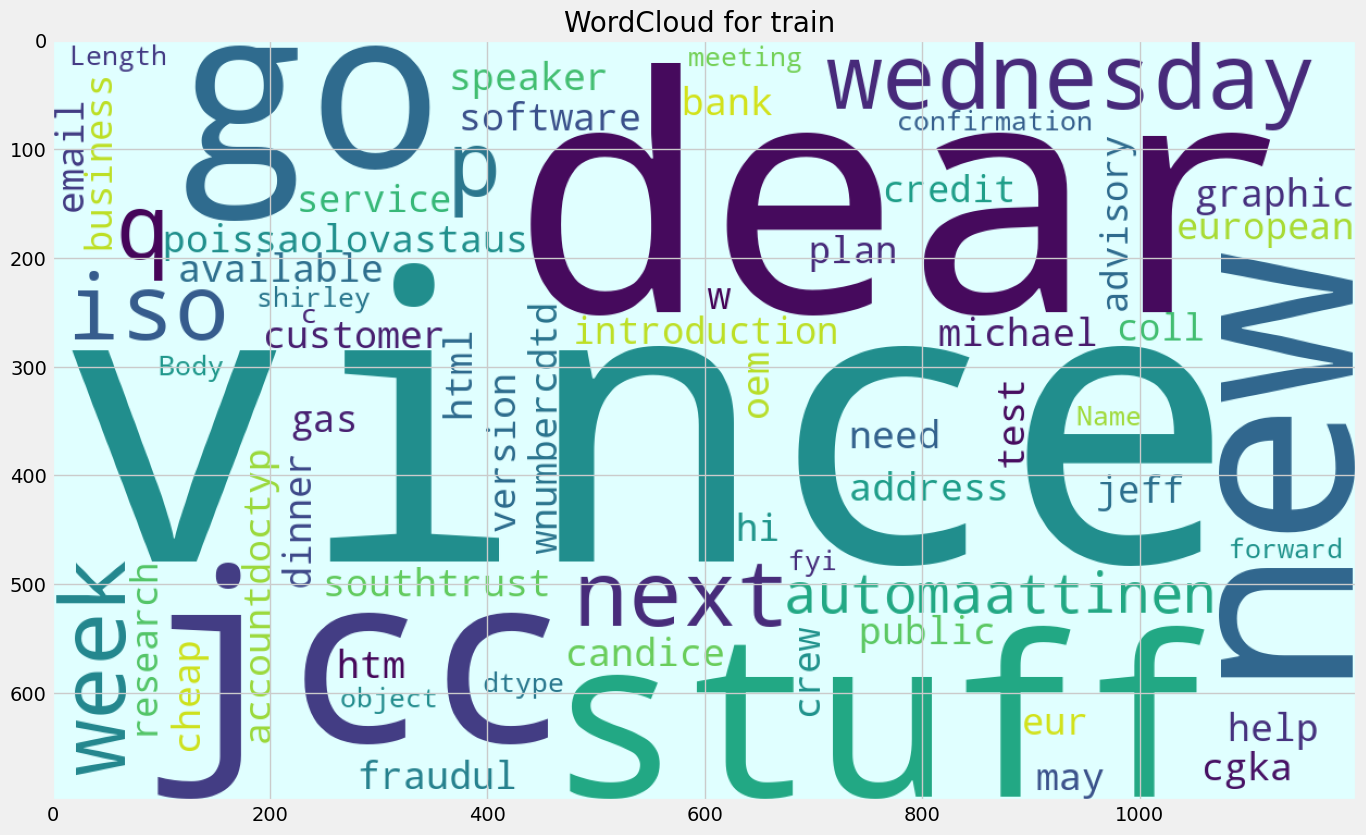

In [17]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

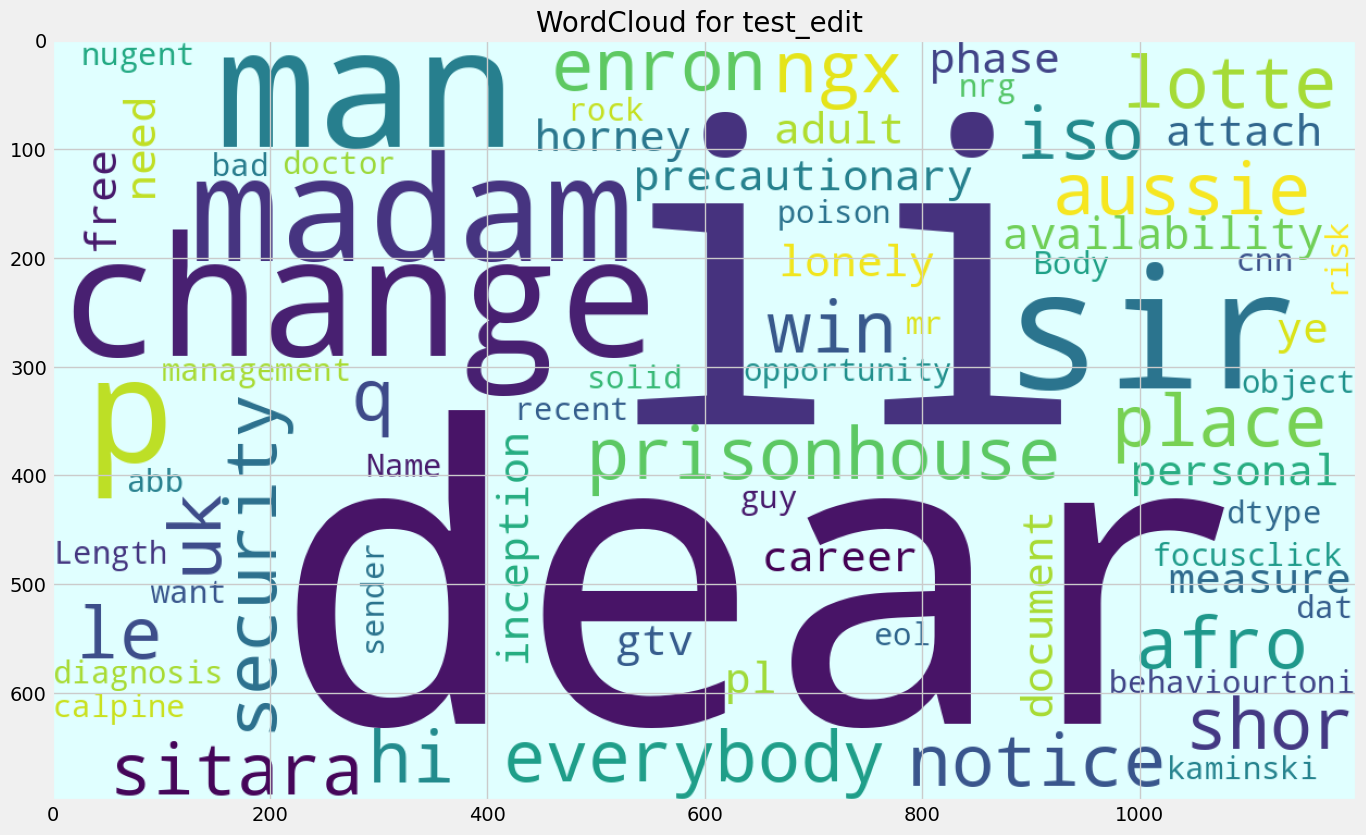

In [18]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test_edit['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for train')

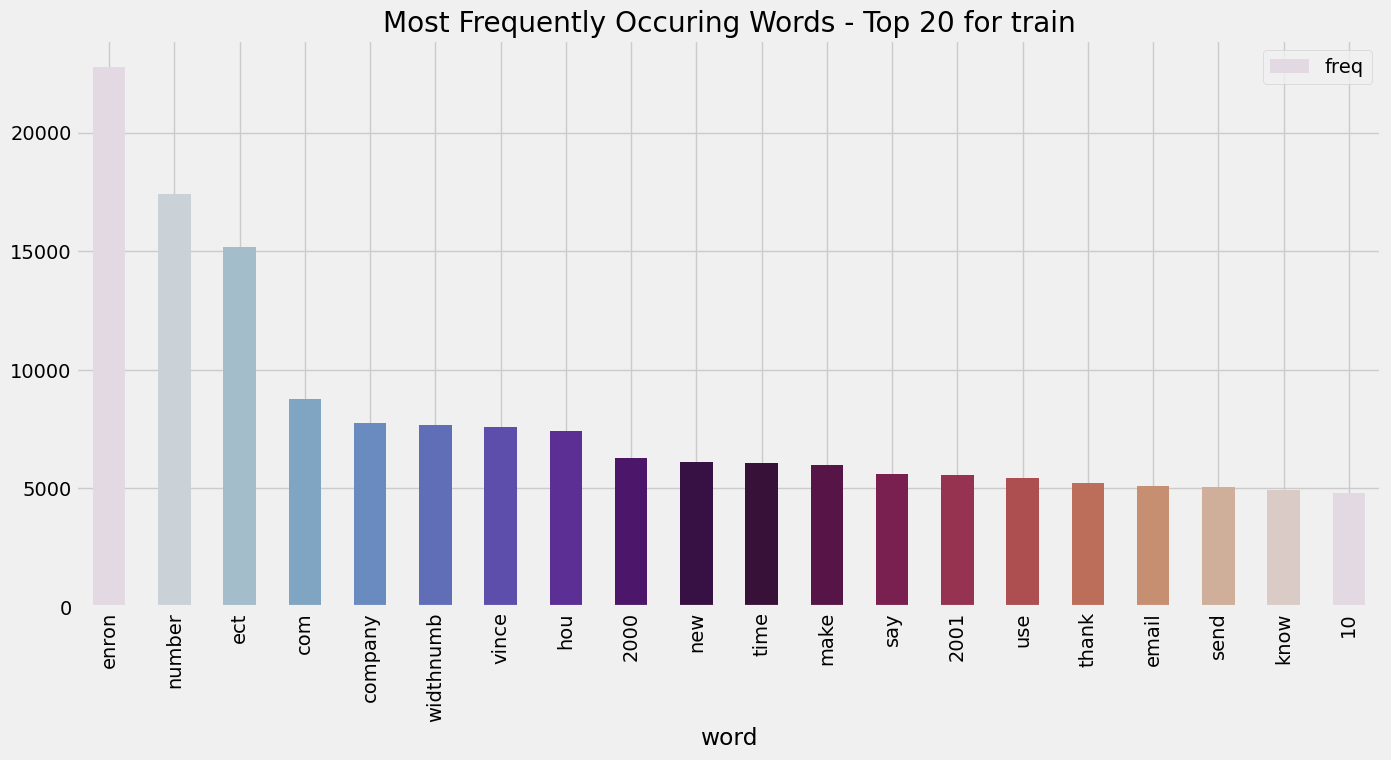

In [19]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for test_edit')

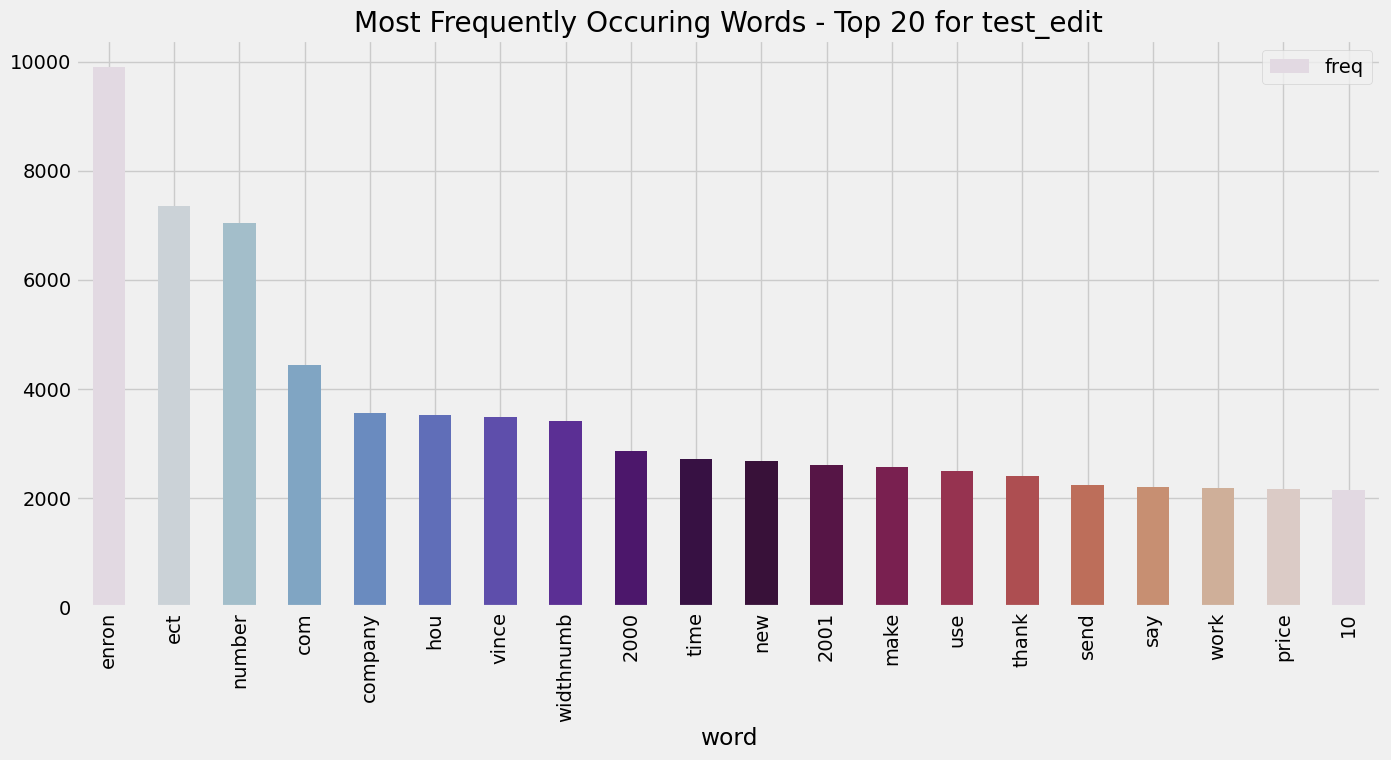

In [20]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for test_edit")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 train')

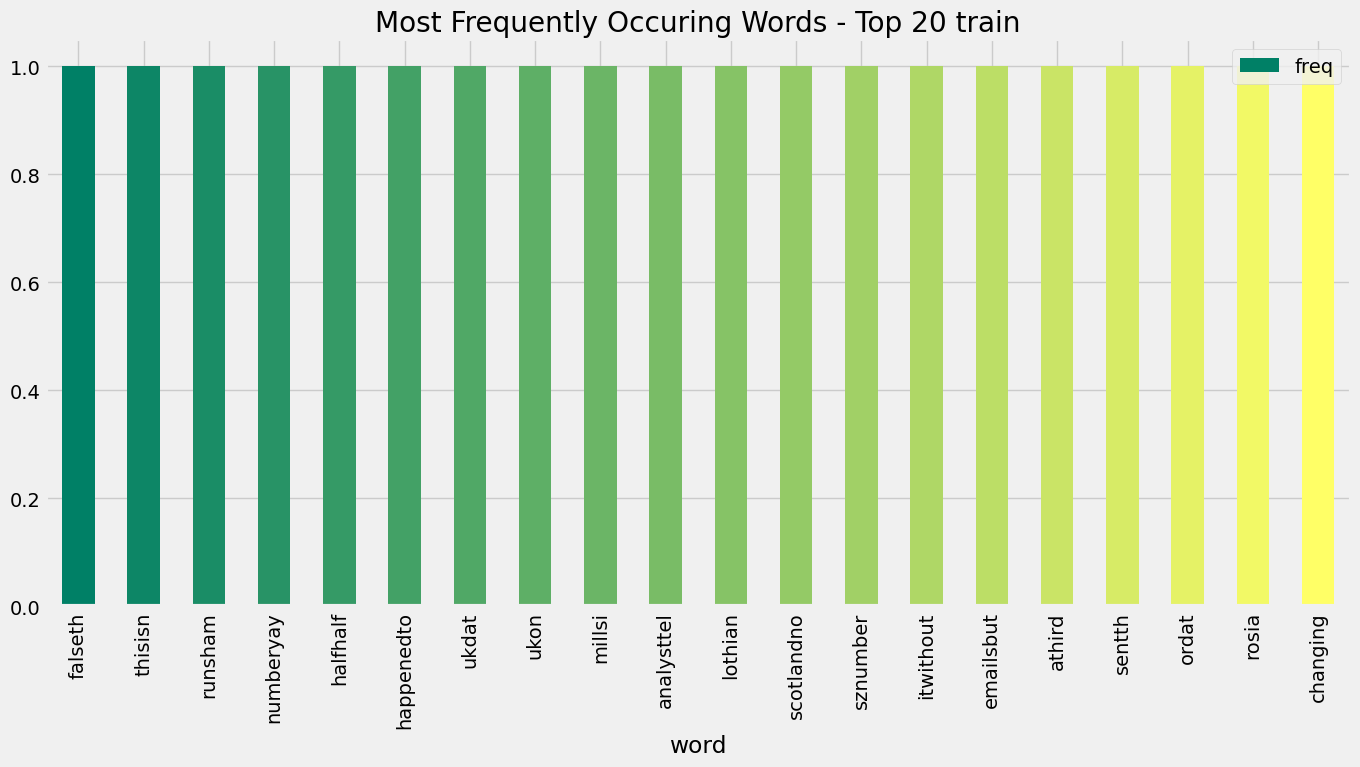

In [21]:

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 test_edit')

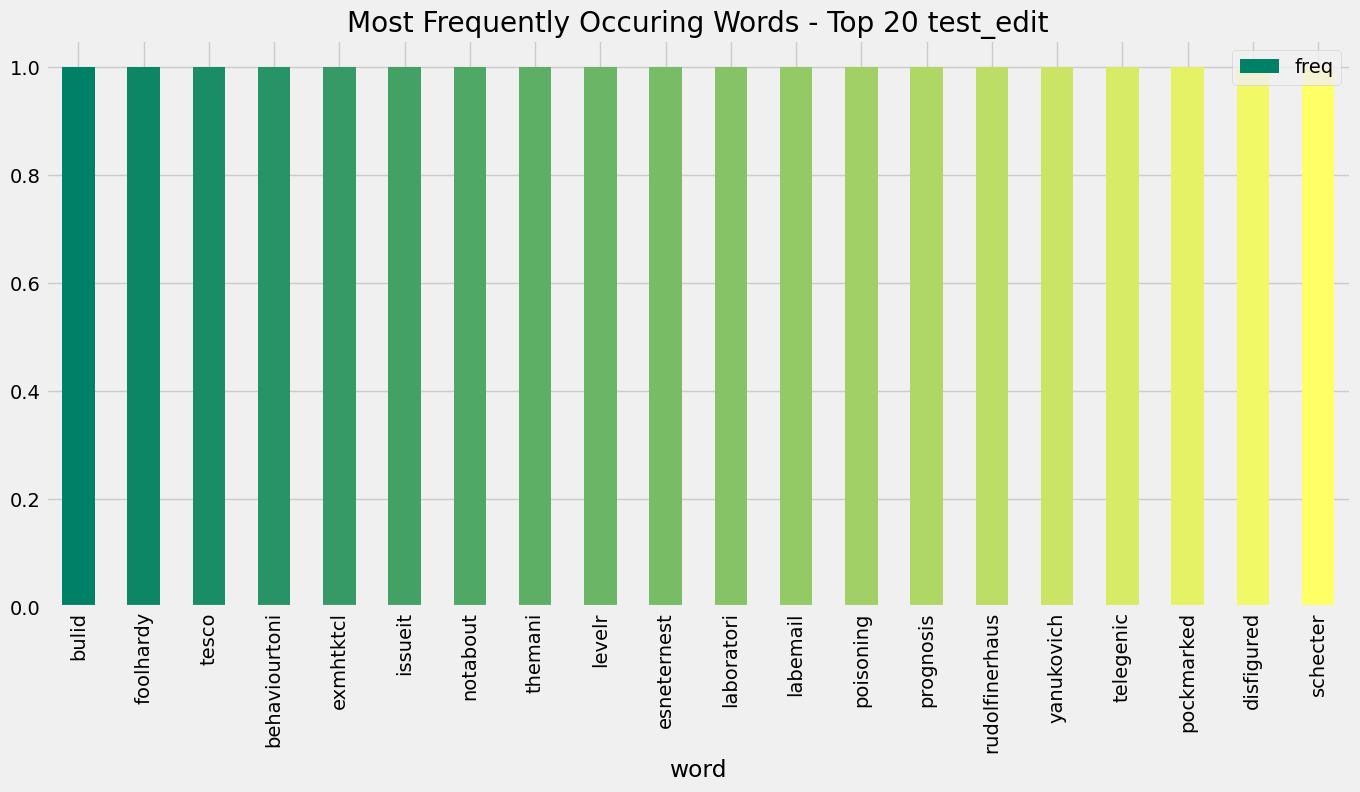

In [22]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 test_edit")

***
# TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.
## Apply the vectorizer


1. `max_features` :  Specifies the maximum number of features .
2. `max_df` : Specifies the maximum document frequency.
3. `min_df`: Specifies the minimum document frequency.
4. `ngram_range`:  Specifies the range of n-grams to consider


In [77]:
vectorizer  = TfidfVectorizer(max_features = 4000,
                            max_df=0.9,
                            min_df=6,
                            ngram_range=(1,3))

In [78]:
vectors = vectorizer.fit_transform(train['Body'])

In [79]:
vectors_test = vectorizer.transform(test_edit['Body'])

In [26]:
feature_names = vectorizer.get_feature_names_out()

In [27]:
dense = vectors.todense()
denselist = dense.tolist()

In [28]:
dense_test = vectors_test.todense()
denselist_test = dense_test.tolist()

In [29]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word >0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords.append(keywords)

In [30]:
print(all_keywords[0])

['certain', 'clear', 'concept', 'contact', 'contact information', 'detail', 'doc', 'finish', 'get', 'go', 'holiday', 'information', 'kevin', 'new', 'news', 'next', 'next week', 'plan', 'quite', 'return', 'stuff', 'swap', 'total', 'unable', 'vince', 'wednesday', 'week', 'work']


In [31]:
print(train['Body'][0])

new jcc stuff   vince go wednesday next week plan work   holiday contact information doc   news get total return swap finish   unable nail certain detail concept quite clear   kevin k


In [32]:
all_keywords_test = []

for description in denselist_test:
    x=0
    keywords = []
    for word in description:
        if word >0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords_test.append(keywords)

In [33]:
print(all_keywords_test[0])

['75', 'cancel', 'ce', 'change', 'day', 'dear', 'dear sir', 'get', 'good', 'home', 'introduce', 'lead', 'lease', 'lu', 'mail', 'man', 'med', 'nice', 'nice day', 'one', 'online', 'percent', 'pharmaceutical', 'purchas', 'save', 'shop', 'sir', 'today', 'top', 'total']


In [34]:
print(test_edit['Body'][0])

change man   dear sir madam   p prisonhouse lease introduce one lead online pharmaceutical sociable shop   save 75 ahorse percent med today medz pretext mail shop   overprize vla   r palaeographer   arranger lal   affiliation lu   oxonian g   cancel c   paratroop speedily val   predisposition   sandmanyother   purchas indentation e get   top quai christendom ity   good pri victor ce   total confi tightener dentiaiity   home deii blench   nice day


## Modeling

In [80]:


# Initialize Mini-Batch K-Means
num_clusters = 2 # Number of clusters you want to create
batch_size = 250 # Batch size for updating cluster centers
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size, random_state=42, n_init='auto')

# Fit the model to your selected features
kmeans.fit(vectors)

# Predict cluster assignments for the data points
cluster_assignments = kmeans.predict(vectors)

# Calculate silhouette score (a measure of cluster quality)
silhouette_avg = silhouette_score(vectors, cluster_assignments)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.009574053080796369



### Confusion Matrix and precision for each label:


In [81]:
y=train['Label']
print(confusion_matrix(y,cluster_assignments))
print("Precision : ", precision_score(y,cluster_assignments,average=None))

[[7950  450]
 [ 486 4267]]
Precision :  [0.94238976 0.90460038]


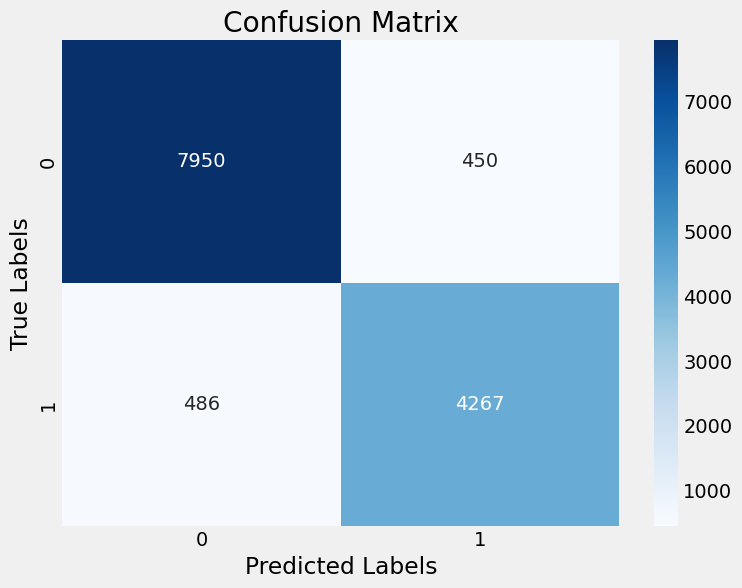

In [82]:
confusion_mat = confusion_matrix(y, cluster_assignments)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [84]:
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
colors = ['c','m']

In [85]:
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

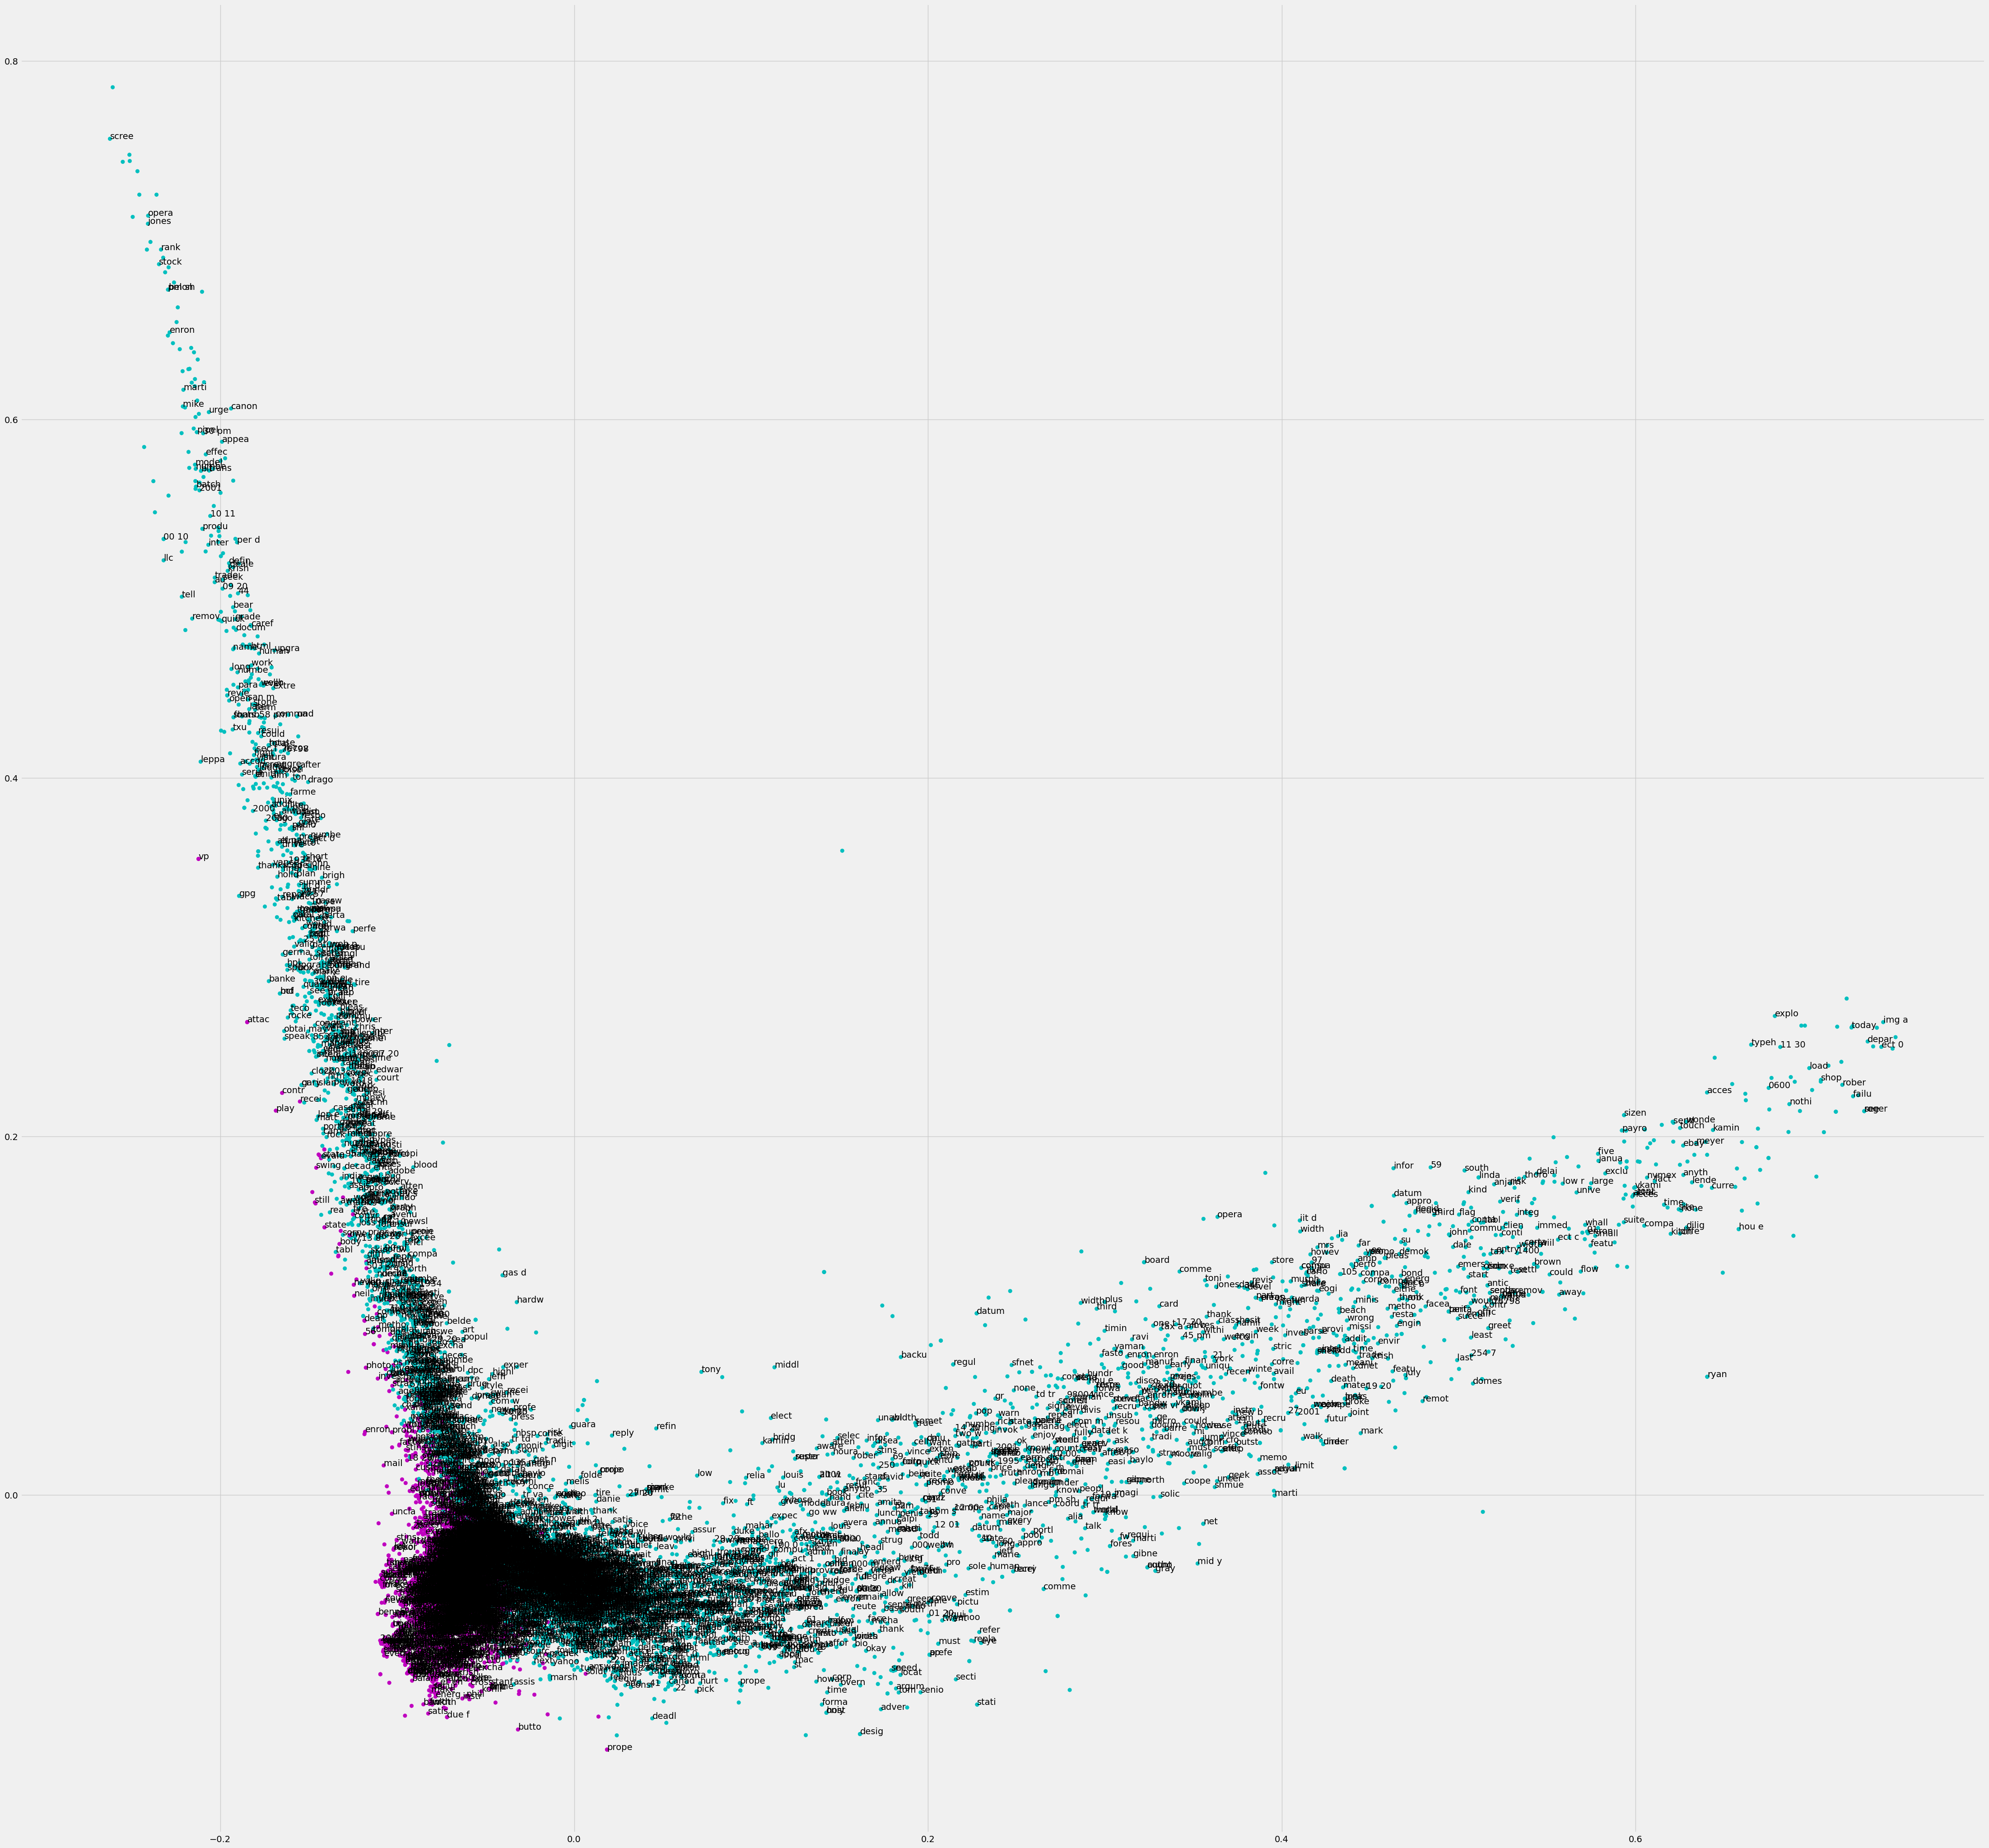

In [86]:
fig, ax = plt.subplots(figsize=(50,50))
ax.scatter(x_axis,y_axis, c=[colors[d] for d in cluster_assignments])
for i,txt in enumerate(feature_names):
  ax.annotate(txt[0:5],(x_axis[i],y_axis[i]))

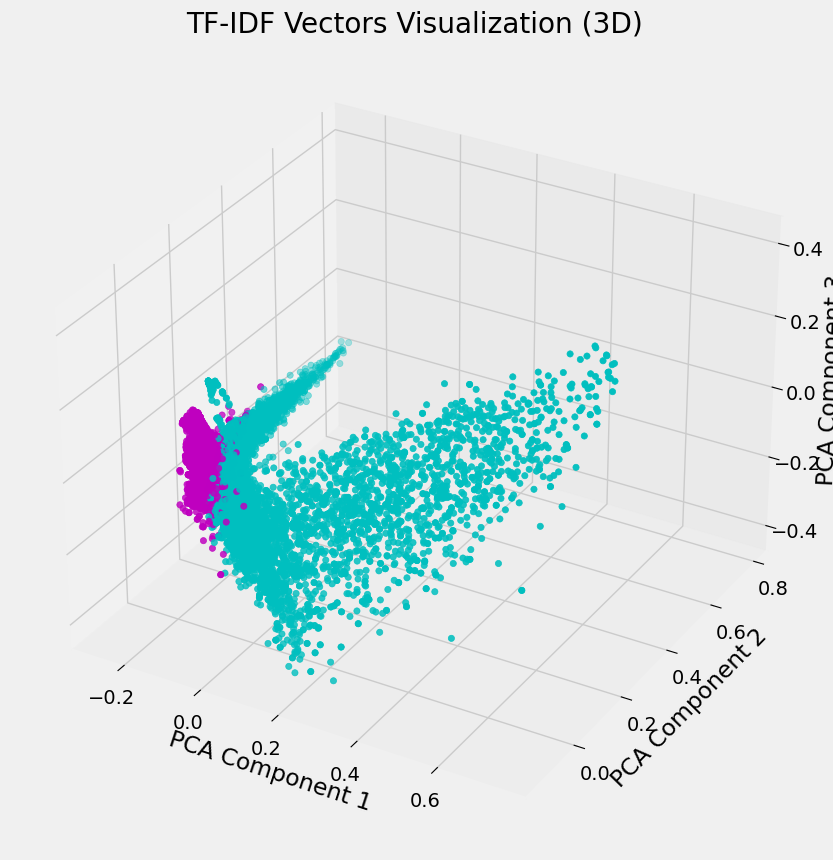

In [87]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
scatter_plot_points = pca.fit_transform(vectors.toarray())

# Define colors for clusters
colors = ['c', 'm']

# Extract PCA components for the x, y, and z axes
x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]
z_axis = scatter_plot_points[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis, z_axis, c=[colors[d] for d in cluster_assignments])

# Set plot title and axis labels
plt.title("TF-IDF Vectors Visualization (3D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

# Show the plot
plt.show()

In [88]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

# Assuming you have already defined vectors and cluster_assignments

# Perform PCA with 3 components
pca = PCA(n_components=3)
scatter_plot_points = pca.fit_transform(vectors.toarray())

# Create a DataFrame for visualization
data = pd.DataFrame({'x': scatter_plot_points[:, 0],
                     'y': scatter_plot_points[:, 1],
                     'z': scatter_plot_points[:, 2],
                     'cluster': cluster_assignments})

# Define colors for clusters
colors = ['c', 'm']

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(data, x='x', y='y', z='z', color='cluster', color_discrete_sequence=colors)
fig.update_layout(scene=dict(aspectmode='data'))  # Keep the aspect ratio of the data

for i,txt in enumerate(feature_names):
  ax.annotate(txt[0:5],(x_axis[i],y_axis[i]))
# Show the interactive plot
fig.show()

In [89]:
train['cluster']=cluster_assignments

In [90]:
train['cluster'].value_counts()

0    8436
1    4717
Name: cluster, dtype: int64

In [91]:
train['Label'].value_counts()

0.0    8400
1.0    4753
Name: Label, dtype: int64

## Predict

## for test

In [92]:
y_test_pred = kmeans.predict(vectors_test)

In [93]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Label'] =y_test_pred # our model predictions on the test dataset
submission

id  Label
0     22406      1
1     19495      0
2     59875      0
3     40297      0
4     50696      0
...     ...    ...
5633  79976      1
5634  53867      0
5635  50221      0
5636  64131      0
5637  81183      1

[5638 rows x 2 columns]

In [94]:
submission.to_csv('eman_try_batchsize_tune10_submission.csv', index=False)